## Libraries and Data Ingestion

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('credit_data.csv')
df.head()

## Data Summary

In [94]:
df.shape

(1000, 10)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1000 non-null   int64 
 1   sex               1000 non-null   object
 2   job               1000 non-null   int64 
 3   housing           1000 non-null   object
 4   saving_accounts   817 non-null    object
 5   checking_account  606 non-null    object
 6   credit_amount     1000 non-null   int64 
 7   duration          1000 non-null   int64 
 8   purpose           1000 non-null   object
 9   risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [98]:
df['job'] = df['job'].astype(object)

In [100]:
df.describe()

,age,credit_amount,duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


## Exploratory Data Analysis

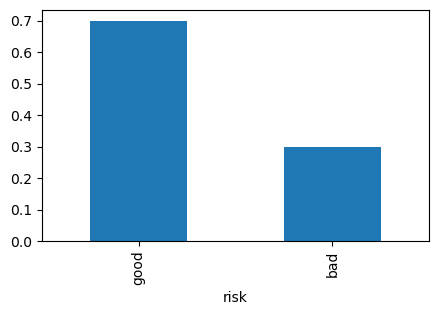

In [103]:
ct = df['risk'].value_counts(normalize=True)
plt.figure(figsize=(5,3))
ct.plot(kind='bar')
plt.show()

## Bivariate Analysis

## Age vs Risk

In [107]:
mn = df.groupby('risk')['age'].agg('mean')
print('mean of age','\n', mn)

mean of age 
 risk
bad     33.963333
good    36.224286
Name: age, dtype: float64


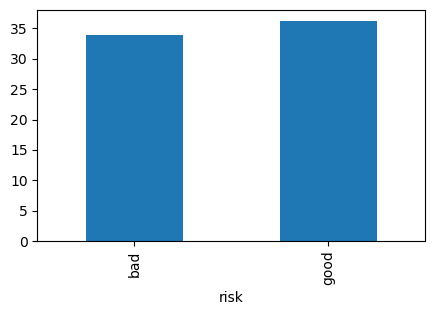

In [109]:
plt.figure(figsize=(5,3))
mn.plot.bar()
plt.show()

In [111]:
type(mn)
mn.reindex(axis = 1)

risk
bad     33.963333
good    36.224286
Name: age, dtype: float64

### T-test

In [130]:
df0 = df['age'][df['risk']=='good']
df1 = df['age'][df['risk']=='bad']

In [132]:
stat, pvalue = stats.ttest_ind(df0, df1, equal_var=False)
print('t-statistic', stat)
print('p-value', pvalue)

t-statistic 2.9071521165499394
p-value 0.0037884908809601527


## credit_amount vs saving_accounts

In [135]:
df.saving_accounts.value_counts()

saving_accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

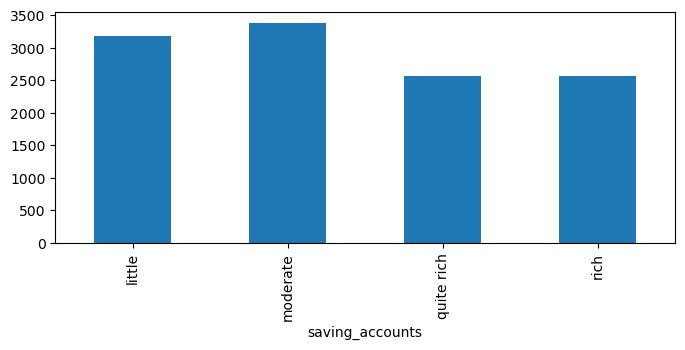

In [137]:
mn = df.groupby('saving_accounts')['credit_amount'].agg('mean')
mn.plot.bar(figsize=(8, 3))
plt.show()

## ANOVA

In [145]:
mod = ols('credit_amount ~ saving_accounts', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)

                       sum_sq     df         F    PR(>F)
saving_accounts  4.314205e+07    3.0  1.933774  0.122591
Residual         6.045949e+09  813.0       NaN       NaN


## Housing vs Checking Account

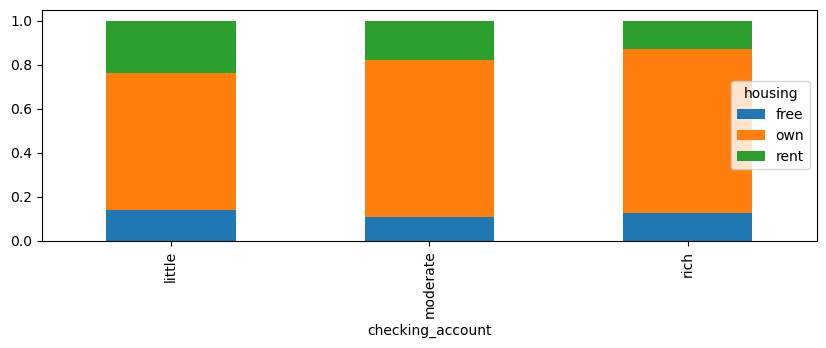

In [148]:
ct = pd.crosstab(df['housing'], df['checking_account'], normalize=1).T
ct.plot.bar(stacked=True, figsize=(10,3))
plt.show()

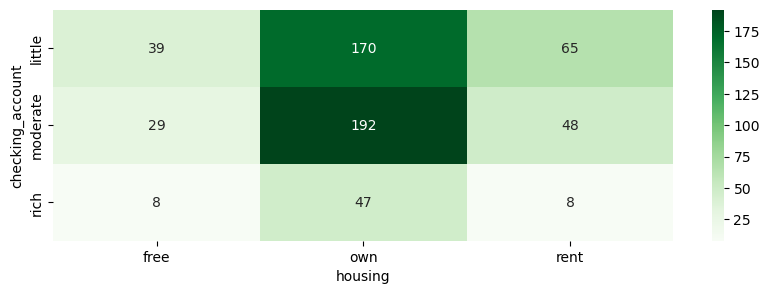

In [164]:
plt.figure(figsize=(10, 3))
sns.heatmap(ct, annot=True, fmt="d", cmap="Greens")
plt.show()

## Chi-square Test

In [151]:
ct = pd.crosstab(df['housing'], df['checking_account']).T
ct

housing,free,own,rent
checking_account,,,
little,39,170,65
moderate,29,192,48
rich,8,47,8


In [153]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expctd = chi2_contingency(ct)
print('chi2', chi2)
print('p-value', pvalue)

chi2 7.77978681138308
p-value 0.09998622016196781


In [155]:
print(expctd)

[[ 34.3630363  184.92739274  54.70957096]
 [ 33.7359736  181.55280528  53.71122112]
 [  7.9009901   42.51980198  12.57920792]]


Since the p-value(0.099) is greater than significance level (5%), we will accept the null hypothesis to conclude that there is independence between `housing` and `checking_Account`.
However, if we set significance level as 10%, we can reject the NULL hypothesis to conclude that there is dependence between `housing` and `checking_Account`.

## Purpose vs Job category

In [166]:
df.purpose.value_counts()

purpose
car                    337
radio_TV               280
furniture_equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation_others         12
Name: count, dtype: int64

In [168]:
df.job.value_counts()

job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

<Figure size 1500x300 with 0 Axes>

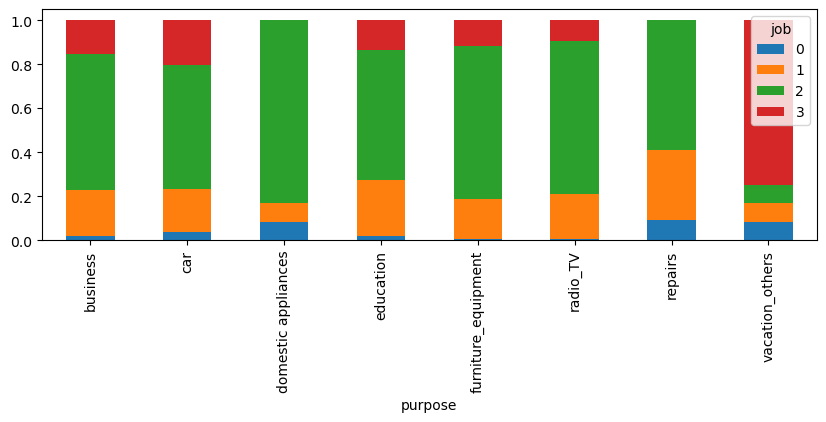

In [171]:
ct = pd.crosstab(df['job'], df['purpose'], normalize=1).T
plt.figure(figsize=(15,3))
ct.plot.bar(stacked=True, figsize=(10,3))
plt.show()

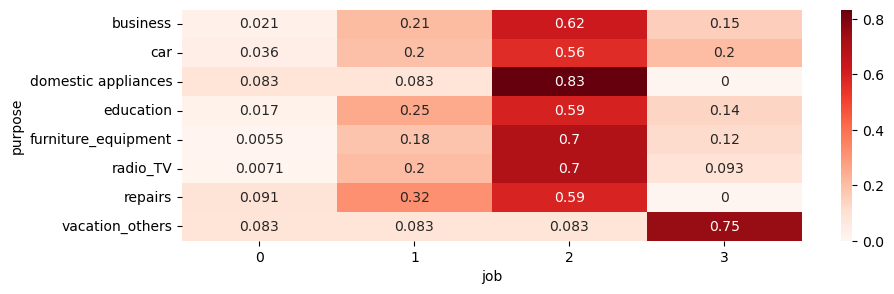

In [179]:
plt.figure(figsize=(10, 3))
sns.heatmap(ct, annot=True, cmap="Reds")
plt.show()

### Chi-square Test - 2

In [182]:
ct = pd.crosstab(df['purpose'], df['job']).T
ct

purpose,business,car,domestic appliances,education,furniture_equipment,radio_TV,repairs,vacation_others
job,,,,,,,,
0,2,12,1,1,1,2,2,1
1,20,66,1,15,33,57,7,1
2,60,190,10,35,126,195,13,1
3,15,69,0,8,21,26,0,9


In [184]:
from scipy.stats import chi2_contingency
chi2, pvalue, dof, expctd = chi2_contingency(ct)
print('chi2', chi2)
print('p-value', pvalue)

chi2 82.27866116778232
p-value 3.3476980586763662e-09


In [186]:
print(expctd)

[[  2.134   7.414   0.264   1.298   3.982   6.16    0.484   0.264]
 [ 19.4    67.4     2.4    11.8    36.2    56.      4.4     2.4  ]
 [ 61.11  212.31    7.56   37.17  114.03  176.4    13.86    7.56 ]
 [ 14.356  49.876   1.776   8.732  26.788  41.44    3.256   1.776]]


## Age vs credit_amount

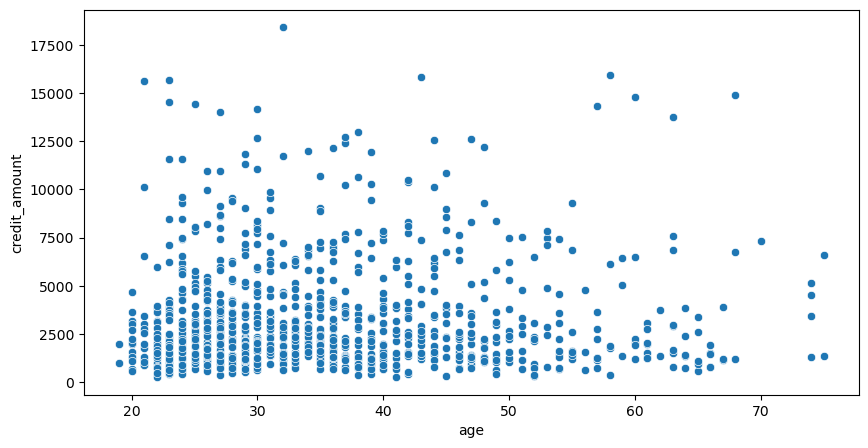

In [189]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='age', y='credit_amount')
plt.show()

In [195]:
df['age_cat'] = pd.cut(df['age'], bins=[19,35,60,76])
#df.groupby('age_cat')['age'].agg(['min', 'max']) ### for checking categorization
mn = df.groupby('age_cat')['credit_amount'].agg('mean')
mn

C:\Users\Vani\AppData\Local\Temp\ipykernel_15488\826137623.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mn = df.groupby('age_cat')['credit_amount'].agg('mean')


age_cat
(19, 35]    3209.136519
(35, 60]    3398.495913
(60, 76]    3122.066667
Name: credit_amount, dtype: float64

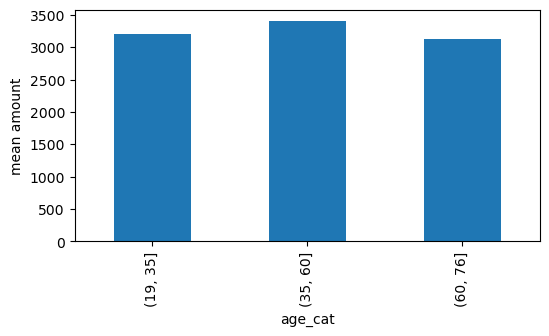

In [199]:
plt.figure(figsize=(6,3))
mn.plot.bar()
plt.ylabel('mean amount')
plt.show()

In [201]:
df['credit_amount'].quantile([.25, 0.5, 0.75])

0.25    1365.50
0.50    2319.50
0.75    3972.25
Name: credit_amount, dtype: float64

In [205]:
df['amt_cat'] = pd.cut(df['credit_amount'], bins=[250, 1365, 2320, 3972, 18425])

<Figure size 1500x300 with 0 Axes>

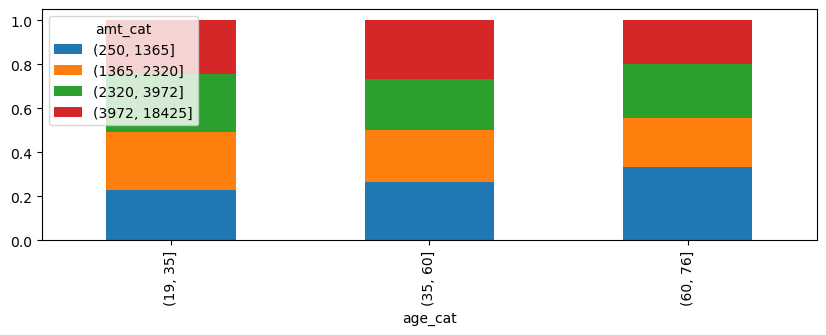

In [207]:
ct = pd.crosstab(df['age_cat'], df['amt_cat'], normalize=0)
plt.figure(figsize=(15,3))
ct.plot.bar(stacked=True, figsize=(10,3))
plt.show()

In [209]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,age_cat,amt_cat
0,67,male,2,own,NaN,little,1169,6,radio_TV,good,"(60, 76]","(250, 1365]"
1,22,female,2,own,little,moderate,5951,48,radio_TV,bad,"(19, 35]","(3972, 18425]"
2,49,male,1,own,little,NaN,2096,12,education,good,"(35, 60]","(1365, 2320]"
3,45,male,2,free,little,little,7882,42,furniture_equipment,good,"(35, 60]","(3972, 18425]"
4,53,male,2,free,little,little,4870,24,car,bad,"(35, 60]","(3972, 18425]"
